In [1]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

%run "..//JM_custom_figs.py"

C:\Github\Distraction-Paper\JM_custom_figs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [5]:
d = disDict['thph1.1']
d.keys()

dict_keys(['rat', 'fs', 'tick', 'licks', 'licks_off', 'distractors', 'distracted', 'notdistracted', 'd_bool_array', 'pdp', 'pre_dp', 'lickdata', 'snips_distractors', 'snips_distracted', 'snips_not-distracted'])

In [68]:
def makeheatmap(ax, data, events=[], sortevents=[], event_direction='post', ylabel='Trials'):
    
    if len(sortevents)> 0:
        sort_order = np.argsort(sortevents)
        data = [data[i] for i in sort_order]
        events = [events[i] for i in sort_order]
        
    if event_direction == 'pre':
        events = [-event for event in events]
    
    ntrials = np.shape(data)[0]
    xvals = np.linspace(-4.9,15,200)
    yvals = np.arange(1, ntrials+2)
    xx, yy = np.meshgrid(xvals, yvals)
    
    mesh = ax.pcolormesh(xx, yy, data, cmap=heatmap_color_scheme, shading = 'flat')
    
    if len(events) > 0:
        ax.vlines(events, yvals[:-1], yvals[1:], color='w')
    else:
        print('No events')
        
    ax.set_ylabel(ylabel)
    ax.set_yticks([1, ntrials])
    ax.set_xticks([])
    ax.invert_yaxis()
    ax.spines['bottom'].set_visible(False)
    
    return ax, mesh

In [100]:
rat = 'thph1.1'
d = disDict[rat]
heatmap_color_scheme = 'coolwarm'
clims = [-3,4]

(-4.9, 15)

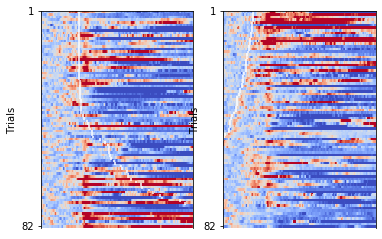

In [101]:
# plots heathaps sorted by post-distraction pause (left) and pre-distraction pause (right)

f, ax = plt.subplots(ncols=2)
ax[0], mesh = makeheatmap(ax[0], d['snips_distractors']['filt_z'], events=d['pdp'], sortevents=d['pdp'])
mesh.set_clim(clims)
ax[0].set_xlim([-4.9,15])

ax[1], mesh = makeheatmap(ax[1], d['snips_distractors']['filt_z'], events=d['pre_dp'], sortevents=d['pre_dp'], event_direction='pre')
mesh.set_clim(clims)
ax[1].set_xlim([-4.9,15])

(-4.9, 15)

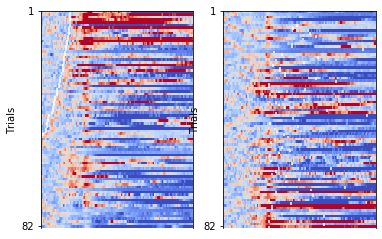

In [70]:



ax[1], mesh = makeheatmap(ax[1], d['snips_distractors']['filt_z'], events=d['pre_dp'])
mesh.set_clim(clims)
ax[1].set_xlim([-4.9,15])